In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
flat = pd.read_csv("C:\\Users\\manjunath.d\\Desktop\\Flat buyers.csv", parse_dates= ['DOB'])

In [4]:
flat.head()

,Name,DOB,AGE,Income,salaried,Maritalstatus,childrens,Country,vehical,sourceenquiry,contribution,BuyApartment
0,Tribhuban Chandra Patra,2061-08-05,58,High,NO,Married,1,MY,4 wheel,paperad,Own,1
1,Rajani Mathews,1976-12-02,43,High,Yes,Married,1,IN,4 wheel,website,Own,1
2,Anupama M,1970-12-08,49,High,Yes,Married,1,IN,4 wheel,reference,Own,1
3,Muralidharan Venugopalan,1977-02-06,43,High,Yes,Married,1,IN,4 wheel,website,Own,1
4,Ravindra Hegde,1976-03-21,44,High,Yes,Married,1,IN,4 wheel,walkin,Own,1


In [5]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 12 columns):
Name             1961 non-null object
DOB              1938 non-null datetime64[ns]
AGE              1961 non-null object
Income           1961 non-null object
salaried         1942 non-null object
Maritalstatus    1961 non-null object
childrens        1961 non-null int64
Country          1961 non-null object
vehical          1961 non-null object
sourceenquiry    1961 non-null object
contribution     1961 non-null object
BuyApartment     1961 non-null int64
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 114.9+ KB


In [6]:
flat.isnull().sum()

Name              0
DOB              23
AGE               0
Income            0
salaried         19
Maritalstatus     0
childrens         0
Country           0
vehical           0
sourceenquiry     0
contribution      0
BuyApartment      0
dtype: int64

In [28]:
flat = flat.fillna(0)
flat = flat.fillna(flat.median())

In [29]:
flat.isnull().sum()

Name             0
DOB              0
AGE              0
Income           0
salaried         0
Maritalstatus    0
childrens        0
Country          0
vehical          0
sourceenquiry    0
contribution     0
BuyApartment     0
dtype: int64

In [30]:
flat.shape

(1961, 12)

In [31]:
threshold = 0.7
flat = flat.loc[flat.isnull().mean(axis=1) < threshold]

In [32]:
flat.shape

(1961, 12)

In [8]:
flat.describe(include = 'all')

,Name,DOB,AGE,Income,salaried,Maritalstatus,childrens,Country,vehical,sourceenquiry,contribution,BuyApartment
count,1961,1938,1961,1961,1942,1961,1961.000000,1961,1961,1961,1961,1961.000000
unique,1923,1711,61,5,2,2,NaN,34,2,4,4,NaN
top,Kevin Myers,1976-03-21 00:00:00,38,High,Yes,Married,NaN,IN,4 wheel,walkin,loan,NaN
freq,3,5,113,842,1533,1943,NaN,1715,1799,513,772,NaN
first,NaN,1970-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2069-12-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.990821,NaN,NaN,NaN,NaN,0.691484
std,NaN,NaN,NaN,NaN,NaN,NaN,0.095391,NaN,NaN,NaN,NaN,0.461999
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000


In [9]:
flat.dtypes

Name                     object
DOB              datetime64[ns]
AGE                      object
Income                   object
salaried                 object
Maritalstatus            object
childrens                 int64
Country                  object
vehical                  object
sourceenquiry            object
contribution             object
BuyApartment              int64
dtype: object

In [10]:
flat.columns

Index(['Name', 'DOB', 'AGE', 'Income', 'salaried', 'Maritalstatus',
       'childrens', 'Country', 'vehical', 'sourceenquiry', 'contribution',
       'BuyApartment'],
      dtype='object')

In [33]:
flat['BuyApartment'].value_counts()

1    1356
0     605
Name: BuyApartment, dtype: int64

In [34]:
flat.groupby('BuyApartment').mean()

,childrens
BuyApartment,
0,0.988430
1,0.991888


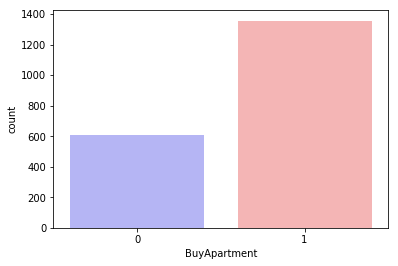

In [35]:
sns.countplot(x="BuyApartment", data=flat, palette="bwr")
plt.show()

## Buys flat = 1345

## Not Buying aprtment = 624

In [36]:
countNoBuying  = len(flat[flat.BuyApartment == 0])
countBuying = len(flat[flat.BuyApartment == 1])
print("Percentage of customers Haven't Bought flat: {:.2f}%".format((countNoBuying / (len(flat.BuyApartment))*100)))
print("Percentage of customers Have Bought flat: {:.2f}%".format((countBuying / (len(flat.BuyApartment))*100)))

Percentage of customers Haven't Bought flat: 30.85%
Percentage of customers Have Bought flat: 69.15%


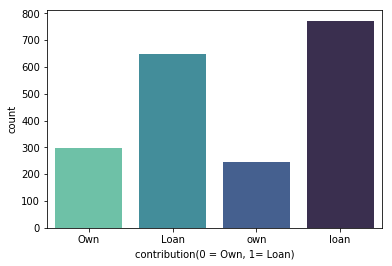

In [37]:
sns.countplot(x='contribution', data=flat, palette="mako_r")
plt.xlabel("contribution(0 = Own, 1= Loan)")
plt.show()

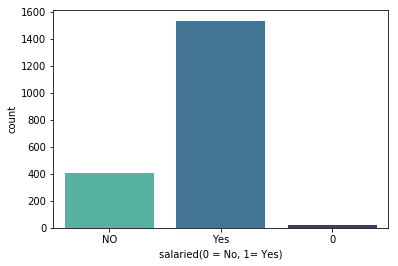

In [38]:
sns.countplot(x='salaried', data=flat, palette="mako_r")
plt.xlabel("salaried(0 = No, 1= Yes)")
plt.show()

# Insight
Customer who is salaried is intended to buy the apartment

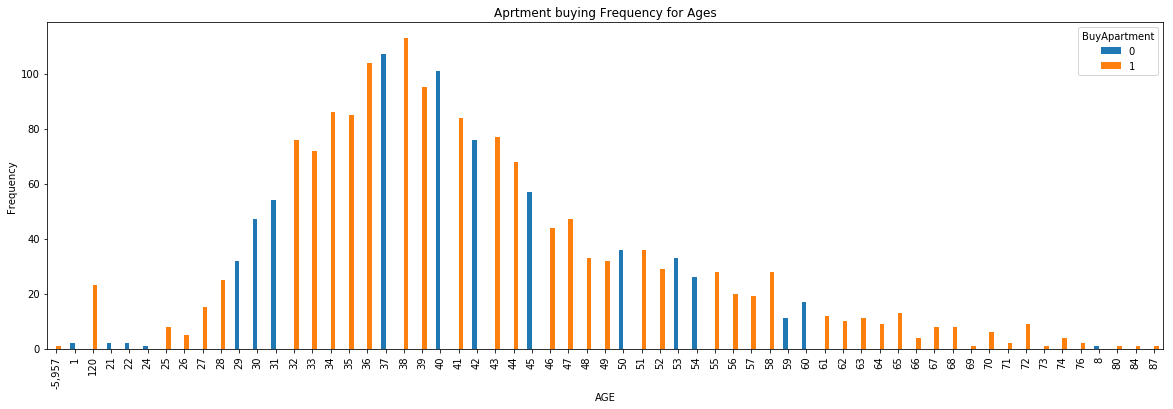

In [39]:
pd.crosstab(flat.AGE,flat.BuyApartment).plot(kind="bar",figsize=(20,6))
plt.title('Aprtment buying Frequency for Ages')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.savefig('Buying flatAndAges.png')
plt.show()

# Insight
The customer who are interested in buying apartment is b/w age 32 to 43

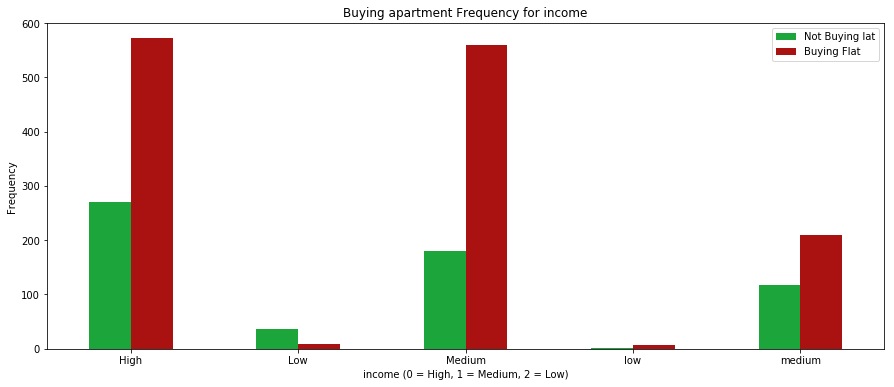

In [40]:
pd.crosstab(flat.Income,flat.BuyApartment).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Buying apartment Frequency for income')
plt.xlabel('income (0 = High, 1 = Medium, 2 = Low)')
plt.xticks(rotation=0)
plt.legend(["Not Buying lat", "Buying Flat"])
plt.ylabel('Frequency')
plt.show()

# Customer whos income is b/w Medium and high is tend to buy apartment

In [41]:
a = pd.get_dummies(flat['Income'], prefix = "Income")
b = pd.get_dummies(flat['salaried'], prefix = "salaried")
c = pd.get_dummies(flat['Maritalstatus'], prefix = "Maritalstatus")
d = pd.get_dummies(flat['Country'], prefix = "Country")
e = pd.get_dummies(flat['vehical'], prefix = "vehical")
f = pd.get_dummies(flat['sourceenquiry'], prefix = "sourceenquiry")
g = pd.get_dummies(flat['contribution'], prefix = "contribution")


In [42]:
frames = [flat, a, b, c , d, e , f, g]
flats = pd.concat(frames, axis = 1)
flats.head()

,Name,DOB,AGE,Income,salaried,Maritalstatus,childrens,Country,vehical,sourceenquiry,...,vehical_2 wheel,vehical_4 wheel,sourceenquiry_paperad,sourceenquiry_reference,sourceenquiry_walkin,sourceenquiry_website,contribution_Loan,contribution_Own,contribution_loan,contribution_own
0,Tribhuban Chandra Patra,2061-08-05 00:00:00,58,High,NO,Married,1,MY,4 wheel,paperad,...,0,1,1,0,0,0,0,1,0,0
1,Rajani Mathews,1976-12-02 00:00:00,43,High,Yes,Married,1,IN,4 wheel,website,...,0,1,0,0,0,1,0,1,0,0
2,Anupama M,1970-12-08 00:00:00,49,High,Yes,Married,1,IN,4 wheel,reference,...,0,1,0,1,0,0,0,1,0,0
3,Muralidharan Venugopalan,1977-02-06 00:00:00,43,High,Yes,Married,1,IN,4 wheel,website,...,0,1,0,0,0,1,0,1,0,0
4,Ravindra Hegde,1976-03-21 00:00:00,44,High,Yes,Married,1,IN,4 wheel,walkin,...,0,1,0,0,1,0,0,1,0,0


In [43]:
flats2 = flats.drop(columns = ['Income', 'salaried', 'Maritalstatus','Country','vehical','sourceenquiry','contribution'])
flats2.head()

,Name,DOB,AGE,childrens,BuyApartment,Income_High,Income_Low,Income_Medium,Income_low,Income_medium,...,vehical_2 wheel,vehical_4 wheel,sourceenquiry_paperad,sourceenquiry_reference,sourceenquiry_walkin,sourceenquiry_website,contribution_Loan,contribution_Own,contribution_loan,contribution_own
0,Tribhuban Chandra Patra,2061-08-05 00:00:00,58,1,1,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,Rajani Mathews,1976-12-02 00:00:00,43,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,Anupama M,1970-12-08 00:00:00,49,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,Muralidharan Venugopalan,1977-02-06 00:00:00,43,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,Ravindra Hegde,1976-03-21 00:00:00,44,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [44]:
y = flats2.BuyApartment.values
x_data = flats2.drop(['BuyApartment','Name','DOB','AGE'], axis = 1)

In [45]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [47]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [48]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 73.54%


C:\Users\manjunath.d\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 53.94%


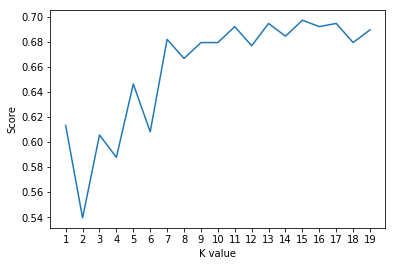

Maximum KNN Score is 69.72%


In [50]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# SUPPORT VECTOR CLASSIFICATION

In [51]:
from sklearn.svm import SVC

In [52]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

C:\Users\manjunath.d\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Accuracy of SVM Algorithm: 70.99%


# NAIVE BAYES CLASSIFICATION

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 30.53%


# DECISION TREE CLASSIFICATION

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 69.47%


# RANDOM FOREST CLASSIFICATION

In [55]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 71.50%


# COMPARING MODELS

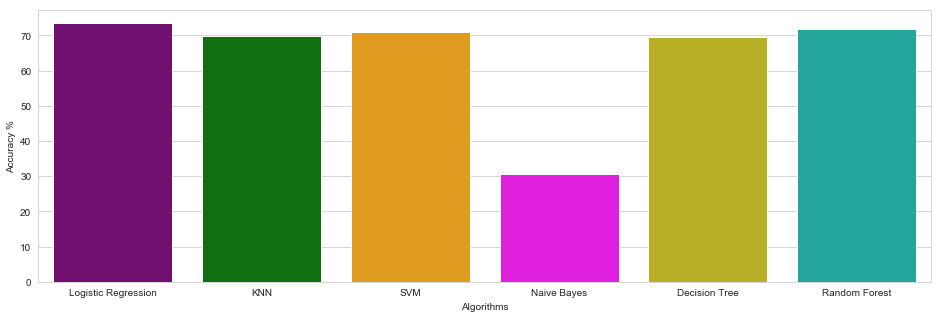

In [93]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# CONFUSION MATRIX

In [94]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [95]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

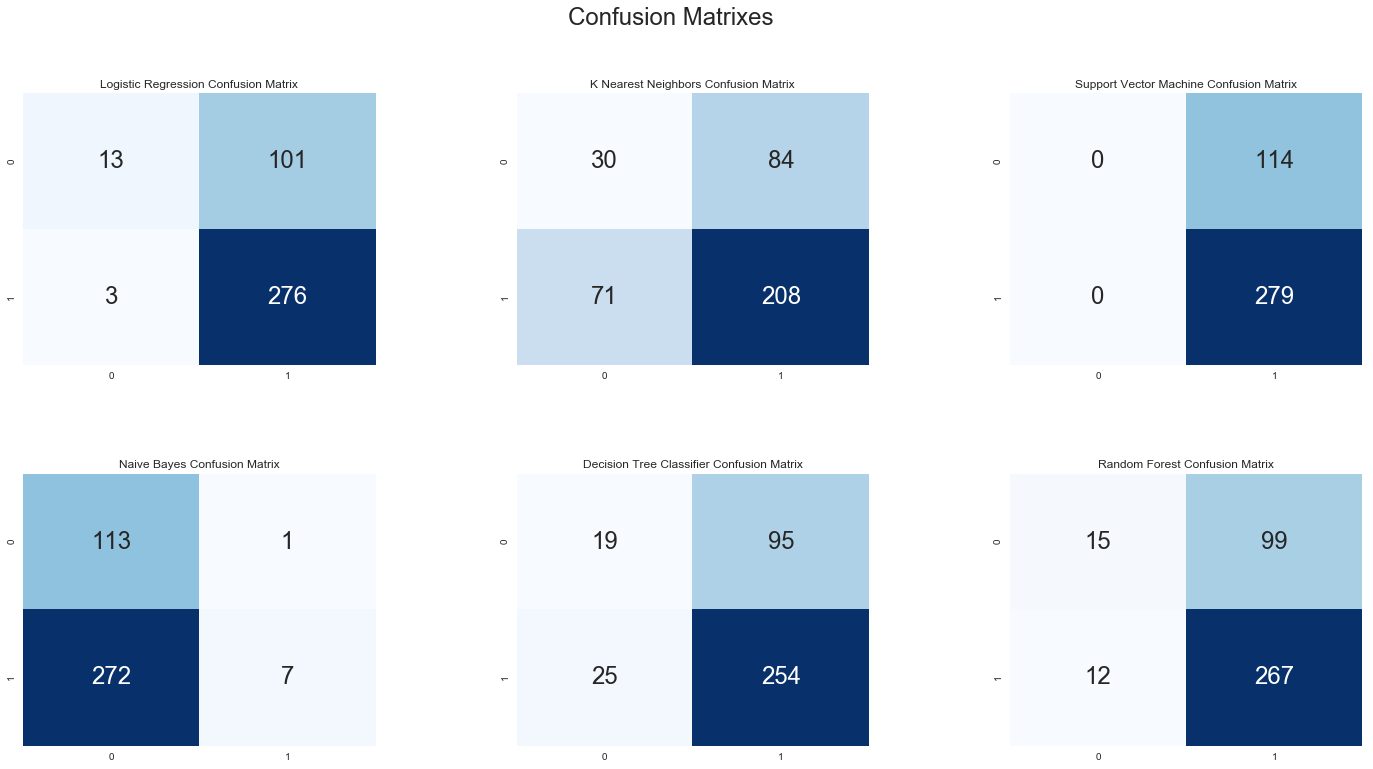

In [97]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()
